In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/train/train_text_seq.csv")


#df.columns
#train_emoticon_X = train_emoticon_df[''].tolist()
#train_emoticon_X
#train_emoticon_df.describe() 

In [3]:
df

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1
...,...,...
7075,0000026267027181596614464154364222842626141596...,1
7076,0000464422155826261433491543615961596284614390...,1
7077,0003069915964309154366142624644222841795262614...,1
7078,0000614159615436198346426242237758262159694061...,0


In [4]:

def many_hot_encode(strings):
    # Step 1: Find all unique characters
    unique_chars = sorted(set(''.join(strings)))
    char_to_index = {char: idx for idx, char in enumerate(unique_chars)}
    
    # Step 2: Create frequency vectors (many-hot vectors)
    many_hot_vectors = []
    for string in strings:
        freq_vector = [0] * len(unique_chars)
        for char in string:
            freq_vector[char_to_index[char]] += 1
        many_hot_vectors.append(freq_vector)
        
    return many_hot_vectors, unique_chars

strings=df['input_str'].tolist()
many_hot_vectors, unique_chars = many_hot_encode(strings)
#df['input_emoticon'].tolist()
#print("Unique characters:", unique_chars)
rows=[]
for i, freq_vector in enumerate(many_hot_vectors):
    rows.append(freq_vector)
    #print(freq_vector)
dfg=pd.DataFrame(rows,columns=unique_chars)
    #print(f"String: {strings[i]}, Frequency vector: {freq_vector}")

In [5]:
dfg


,0,1,2,3,4,5,6,7,8,9
0,6,7,10,3,7,3,8,1,3,2
1,4,8,7,2,9,4,10,2,1,3
2,5,7,7,2,8,6,8,0,2,5
3,5,7,8,3,7,5,9,0,3,3
4,5,7,8,1,8,3,10,1,2,5
...,...,...,...,...,...,...,...,...,...,...
7075,6,7,9,1,9,3,9,2,2,2
7076,5,7,7,4,8,5,8,0,2,4
7077,5,6,7,3,8,4,9,1,1,6
7078,5,6,7,3,8,4,8,2,3,4


In [6]:
dfg_dropped = dfg.loc[:, (dfg != dfg.iloc[0]).any()]
dfg_dropped

,0,1,2,3,4,5,6,7,8,9
0,6,7,10,3,7,3,8,1,3,2
1,4,8,7,2,9,4,10,2,1,3
2,5,7,7,2,8,6,8,0,2,5
3,5,7,8,3,7,5,9,0,3,3
4,5,7,8,1,8,3,10,1,2,5
...,...,...,...,...,...,...,...,...,...,...
7075,6,7,9,1,9,3,9,2,2,2
7076,5,7,7,4,8,5,8,0,2,4
7077,5,6,7,3,8,4,9,1,1,6
7078,5,6,7,3,8,4,8,2,3,4


In [7]:
dfg_dropped.describe()


,0,1,2,3,4,5,6,7,8,9
count,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000
mean,4.587994,6.884605,8.774011,2.540678,8.163418,4.183192,8.898305,0.856921,1.969492,3.141384
std,1.073982,1.239205,1.140653,1.228533,1.022278,0.983506,0.922386,0.852115,0.902619,1.099350
min,3.000000,5.000000,7.000000,1.000000,7.000000,3.000000,8.000000,0.000000,1.000000,2.000000
25%,4.000000,6.000000,8.000000,2.000000,7.000000,3.000000,8.000000,0.000000,1.000000,2.000000
50%,4.000000,7.000000,9.000000,2.000000,8.000000,4.000000,9.000000,1.000000,2.000000,3.000000
75%,5.000000,8.000000,9.000000,3.000000,9.000000,5.000000,9.000000,1.000000,2.000000,4.000000
max,9.000000,13.000000,13.000000,8.000000,13.000000,8.000000,14.000000,5.000000,6.000000,9.000000


In [8]:
constant_columns = {col: dfg[col].iloc[0] for col in dfg.columns if dfg[col].nunique() == 1}
print( constant_columns)

{}


In [9]:
dfg_dropped['label']=df['label'].tolist()



In [10]:
dfg_dropped

,0,1,2,3,4,5,6,7,8,9,label
0,6,7,10,3,7,3,8,1,3,2,0
1,4,8,7,2,9,4,10,2,1,3,0
2,5,7,7,2,8,6,8,0,2,5,0
3,5,7,8,3,7,5,9,0,3,3,1
4,5,7,8,1,8,3,10,1,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...
7075,6,7,9,1,9,3,9,2,2,2,1
7076,5,7,7,4,8,5,8,0,2,4,1
7077,5,6,7,3,8,4,9,1,1,6,1
7078,5,6,7,3,8,4,8,2,3,4,0


In [11]:
df_0 = dfg_dropped[dfg_dropped['label'] == 0]  # Rows where label == 0
df_1 = dfg_dropped[dfg_dropped['label'] == 1]  # Rows where label == 1


In [12]:
df_0.describe().loc[['count', 'mean', 'std']]


,0,1,2,3,4,5,6,7,8,9,label
count,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.0
mean,4.599553,6.880593,8.770694,2.539709,8.171980,4.200503,8.893736,0.848993,1.953579,3.140660,0.0
std,1.070985,1.254030,1.142683,1.235190,1.037646,0.987933,0.928736,0.851565,0.895411,1.104124,0.0


In [13]:
df_1.describe().loc[['count', 'mean', 'std']]


,0,1,2,3,4,5,6,7,8,9,label
count,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.0
mean,4.576199,6.888699,8.777397,2.541667,8.154680,4.165525,8.902968,0.865011,1.985731,3.142123,1.0
std,1.077056,1.224056,1.138731,1.221877,1.006426,0.978792,0.915968,0.852722,0.909757,1.094614,0.0


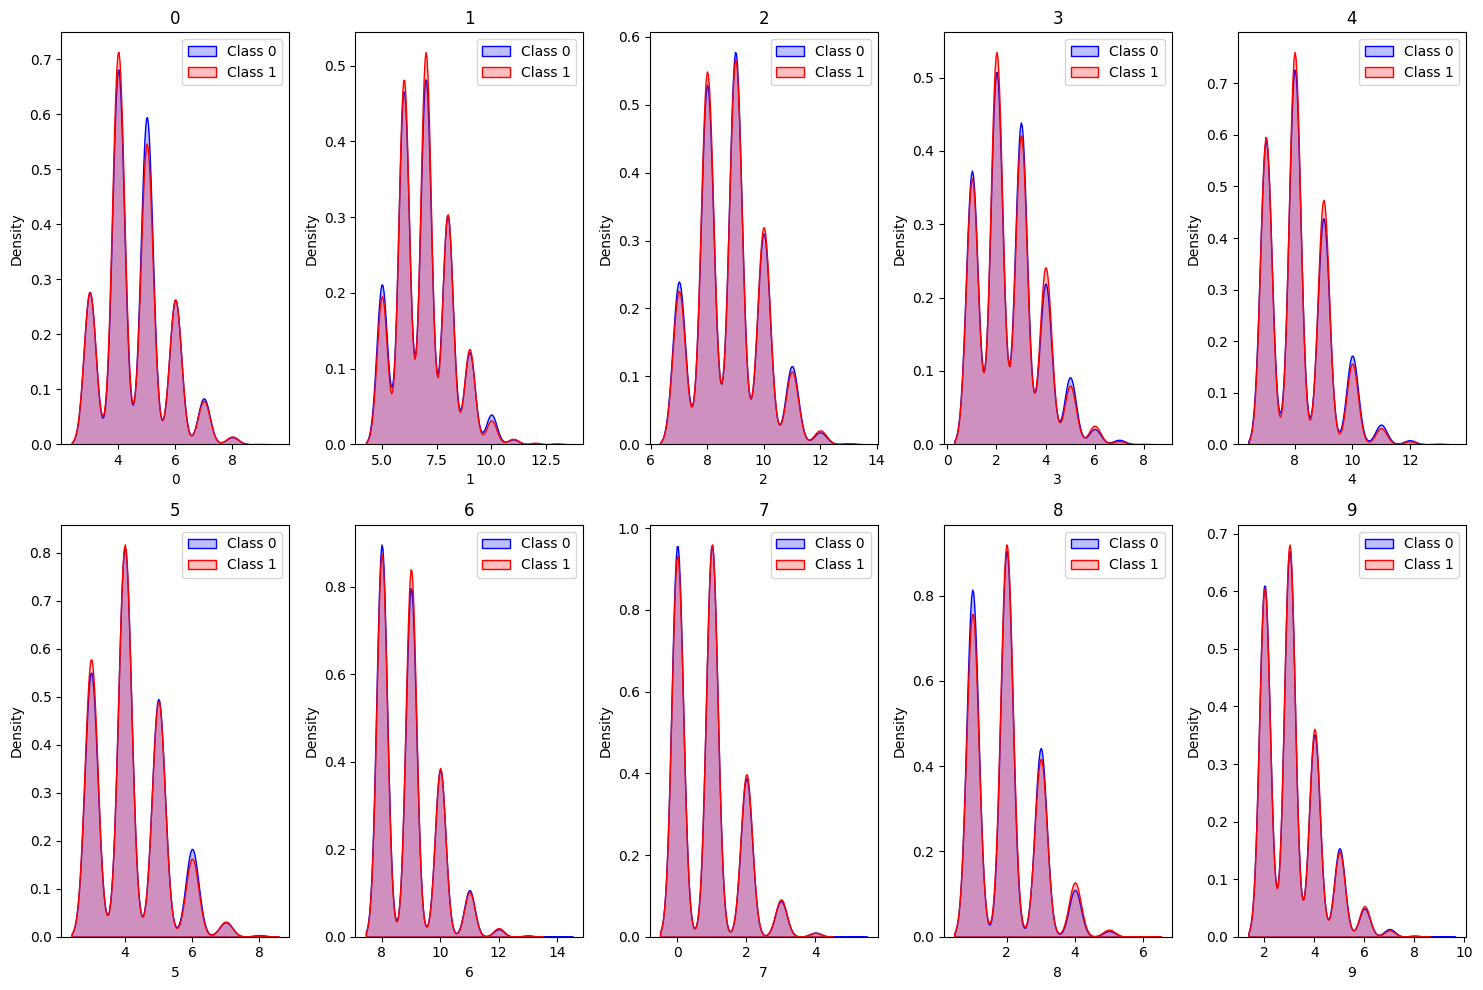

In [14]:
feature_columns = ['0','1','2','3','4','5','6','7','8','9']

# Plot distributions for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(2, 5, i)  # Adjust grid size based on the number of features
    sns.kdeplot(dfg_dropped[dfg_dropped['label'] == 0][feature], label='Class 0', fill=True, color='blue')
    sns.kdeplot(dfg_dropped[dfg_dropped['label'] == 1][feature], label='Class 1', fill=True, color='red')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

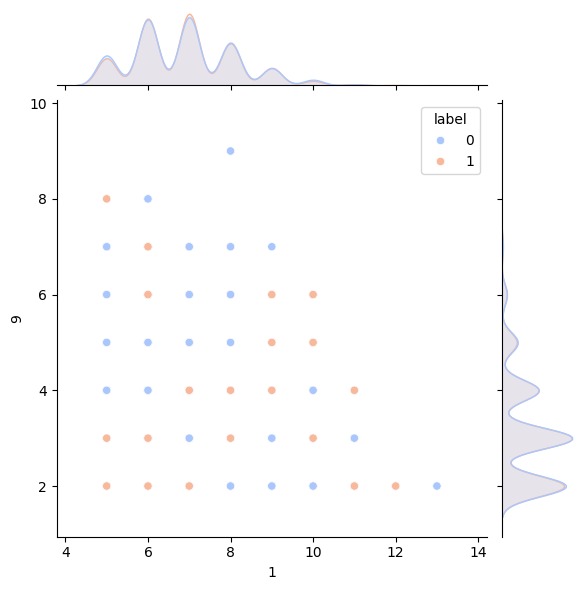

In [15]:
# Plot
sns.jointplot(data=dfg_dropped, x='1', y='9', hue='label', kind='scatter', palette='coolwarm')
plt.show()#we will use decision trees only.

# Display the plot


In [16]:
dfv = pd.read_csv("datasets/valid/valid_text_seq.csv")
def many_hot_encode(strings):
    # Step 1: Find all unique characters
    unique_chars = sorted(set(''.join(strings)))
    char_to_index = {char: idx for idx, char in enumerate(unique_chars)}
    
    # Step 2: Create frequency vectors (many-hot vectors)
    many_hot_vectors = []
    for string in strings:
        freq_vector = [0] * len(unique_chars)
        for char in string:
            freq_vector[char_to_index[char]] += 1
        many_hot_vectors.append(freq_vector)
        
    return many_hot_vectors, unique_chars

strings=dfv['input_str'].tolist()
many_hot_vectors, unique_chars = many_hot_encode(strings)
#df['input_emoticon'].tolist()
#print("Unique characters:", unique_chars)
rows=[]
for i, freq_vector in enumerate(many_hot_vectors):
    rows.append(freq_vector)
    #print(freq_vector)
dfv2=pd.DataFrame(rows,columns=unique_chars)
    #print(f"String: {strings[i]}, Frequency vector: {freq_vector}")
dfv2['label']=dfv['label'].tolist()
dfv2

,0,1,2,3,4,5,6,7,8,9,label
0,4,8,9,4,9,3,9,0,1,3,1
1,5,7,10,3,8,4,9,1,1,2,1
2,3,6,8,5,9,5,10,1,1,2,0
3,5,9,9,4,8,3,8,1,1,2,0
4,4,5,9,4,9,5,9,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
484,3,10,7,4,10,4,8,1,1,2,1
485,5,6,10,1,7,3,9,0,3,6,0
486,5,6,10,2,8,3,9,1,3,3,0
487,5,6,10,2,10,4,9,0,1,3,0


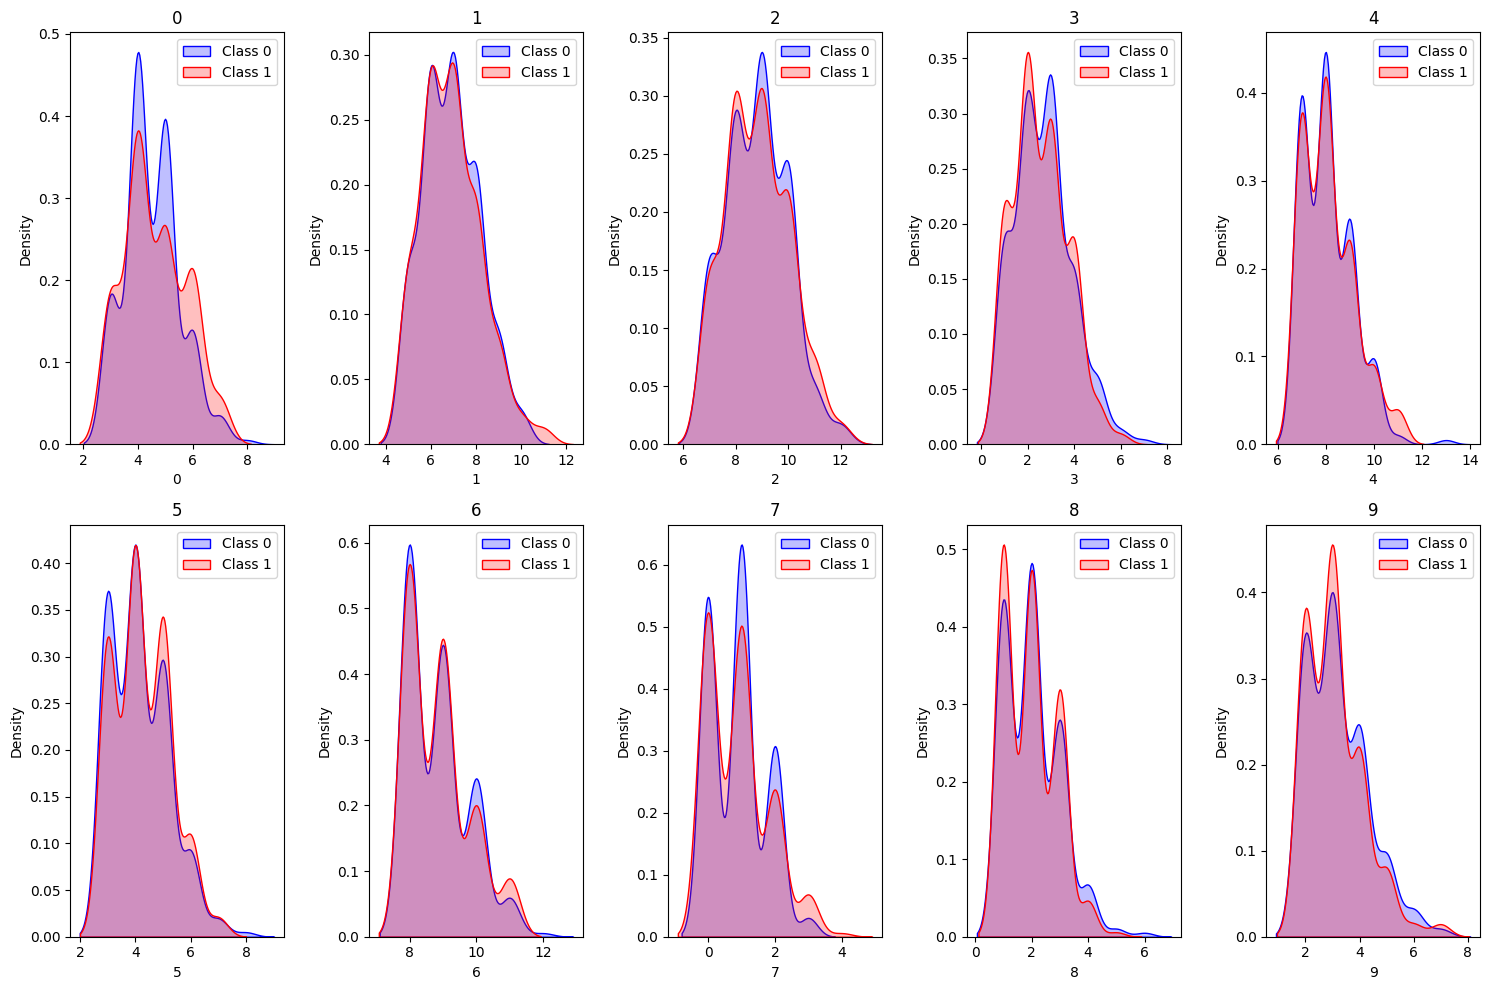

In [93]:
dfv_0 = dfv2[dfv2['label'] == 0]  # Rows where label == 0
dfv_1 = dfv2[dfv2['label'] == 1]  # Rows where label == 1
feature_columns = ['0','1','2','3','4','5','6','7','8','9']

# Plot distributions for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(2, 5, i)  # Adjust grid size based on the number of features
    sns.kdeplot(dfv2[dfv2['label'] == 0][feature], label='Class 0', fill=True, color='blue')
    sns.kdeplot(dfv2[dfv2['label'] == 1][feature], label='Class 1', fill=True, color='red')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

In [85]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn
X=dfg_dropped[['1','9','label']]

y=dfg_dropped['label']
#X=X.values.tolist()
X



,1,9,label
0,7,2,0
1,8,3,0
2,7,5,0
3,7,3,1
4,7,5,1
...,...,...,...
7075,7,2,1
7076,7,4,1
7077,6,6,1
7078,6,4,0


In [91]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# model = LogisticRegression()


Xv=dfv2[['1','9','label']]
Xv
# Xv=Xv.values.tolist()
yv=dfv2['label']
# yv=yv.tolist()
# len(X)
# model.fit(X,y)
# y_pred=model.predict(X)
# y_pred
# accuracy = accuracy_score(y, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# accuracy=(y_pred,yv)
# accuracy]
Xv

,1,9,label
0,8,3,1
1,7,2,1
2,6,2,0
3,9,2,0
4,5,2,1
...,...,...,...
484,10,2,1
485,6,6,0
486,6,3,0
487,6,3,0


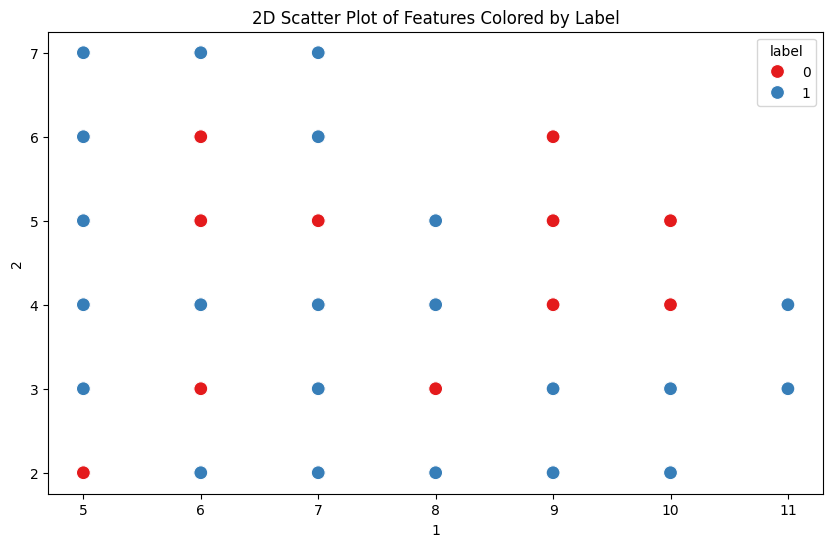

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Xv, x='1', y='9', hue='label', palette='Set1', s=100)

plt.xlabel('1')
plt.ylabel('2')
plt.title('2D Scatter Plot of Features Colored by Label')
plt.show()

In [40]:
Xv=dfv2[['1','2']]
Xv=Xv.values.tolist()
yp=clf.predict(Xv).tolist()
y=dfv2['label']
y=y.tolist()



len(y)
count=0;
for i in range(489):
    if(y[i]==yp[i]):count+=1
count=count/489
count

0.5030674846625767

In [95]:
df_1

,0,1,2,3,4,5,6,7,8,9,label
3,5,7,8,3,7,5,9,0,3,3,1
4,5,7,8,1,8,3,10,1,2,5,1
5,4,6,9,3,7,4,9,1,3,4,1
9,6,6,9,2,8,3,9,1,1,5,1
11,4,9,8,1,8,4,10,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
7070,4,8,9,1,8,5,9,1,2,3,1
7074,5,6,10,4,8,3,10,0,1,3,1
7075,6,7,9,1,9,3,9,2,2,2,1
7076,5,7,7,4,8,5,8,0,2,4,1


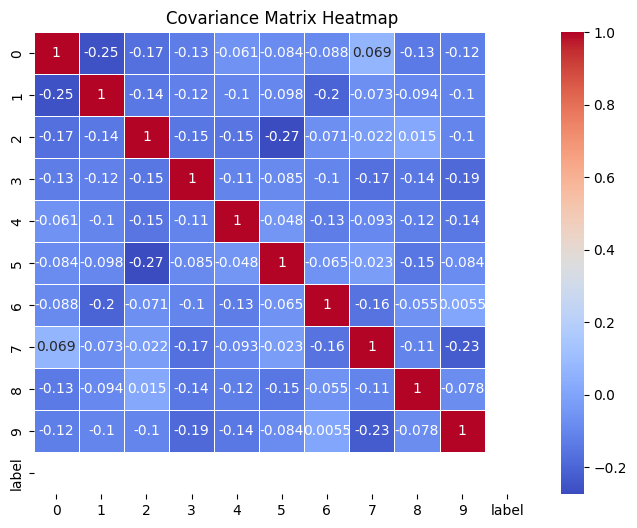

In [97]:
cov_matrix = df_1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()